In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import geopandas as gpd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.
cwd = os.getcwd()

In [6]:
geoframeEstados = gpd.read_file("C:/Users/Andres/Desktop/mexEstados")

In [39]:
geoframeCiudades = gpd.read_file("C:/Users/Andres/Desktop/mexCiudades")

In [9]:
estados_a_filtrar = ["Morelos","Veracruz","Puebla","Hidalgo","Guanajuato","Durango",
                     "Queretaro","Nuevo Leon","Quintana Roo","Tamaulipas","Tlaxcala","Michoacan","Mexico"]
def filtrar(x):
    return x not in estados_a_filtrar

geoframeCiudades['aFiltrar'] = geoframeCiudades['STATE_NAME'].apply(filtrar)
geoframeCiudadesFiltrado = geoframeCiudades[geoframeCiudades['aFiltrar']]

In [4]:
df = pd.read_csv(cwd+"/train.csv", index_col='id', parse_dates=['fecha'])

In [179]:
from shapely.geometry import Point

puntosACorregir = {'Baja California Sur':(-2.8,-0.1),'Sinaloa':(1,0),'Sinaloa':(1,0),'Chihuahua':(-1.5,0),'Coahuila':(-2,2),
                  'Nuevo Leon':(-0.5,0),'Sinaloa':(-1.5,0),'Durango':(-1.6,0.8),'Nayarit':(-0.7,0),'Jalisco':(-1.5,-0.5),
                   'Guanajuato':(-1,0),'Guerrero':(-1.5,0.25),'Colima':(-2,-0.5),'Michoacan':(-2,-1),'Chiapas':(-0.25,-0.25)
                   ,'Tabasco':(-1,0),'Campeche':(-0.75,-0.75),'Quintana Roo':(-0.75,0),'Zacatecas':(-1.2,0.3),'Tamaulipas':(-1,1.6),
                   'Baja California':(-2.5,-4),'Mexico':(-0.8,-0.2),'Puebla':(-0.5,-0.75),'Guanajuato':(-1,-0.25),
                   'Queretaro':(0,-0.25),'Distrito Federal':(-0.7,-1),'Veracruz':(-0.25,0)
                  }

def corregir(punto,tuplaXY):
    deltaX = tuplaXY[0]
    deltaY = tuplaXY[1]
    nuevoPunto = Point(punto.x+deltaX,punto.y+deltaY) 
    return nuevoPunto

def func(provincia, punto):
    if provincia in puntosACorregir.keys():
        return corregir(punto,puntosACorregir[provincia])
    return punto

geoframeCiudades['newGeometry'] = [func(geoframeCiudades.loc[idx, 'STATE_NAME'], geoframeCiudades.loc[idx, 'geometry'])
                                   for idx in range(len(geoframeCiudades))]

geoframeCiudadesCorregido = geoframeCiudades.drop('geometry',axis=1)
geoframeCiudadesCorregido.drop_duplicates(subset ="STATE_NAME", 
                     keep = 'first', inplace = True) 

estados_a_filtrar = ["Aguascalientes","Hidalgo","Tlaxcala","Morelos"]
def filtrar(x):
    return x not in estados_a_filtrar

geoframeCiudadesCorregido['aFiltrar'] = geoframeCiudades['STATE_NAME'].apply(filtrar)
geoframeC_C_Filtrado = geoframeCiudadesCorregido[geoframeCiudadesCorregido['aFiltrar']]
geoframeC_C_Filtrado.at[4,'STATE_NAME'] = 'DF'

Text(0.5, 1, 'Mapa de Prueba')

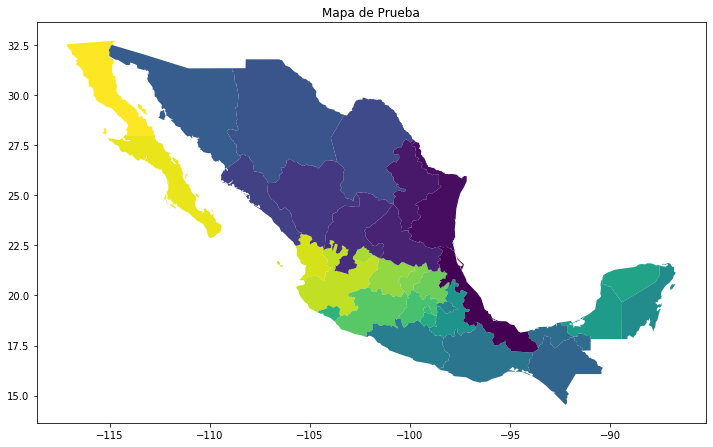

In [187]:
geoplot = geoframeEstados.plot(figsize=(12,12),legend=True,cmap='viridis_r')
plt.title("Mapa de Prueba")
#for locacion,label in zip(geoframeC_C_Filtrado.newGeometry, geoframeC_C_Filtrado.STATE_NAME):
    #geoplot.annotate(label, xy=(locacion.x,locacion.y), xytext=(3, 3), textcoords="offset points")
#plt.show()

In [65]:
geoframeCiudades.head(35)

,NAME,CAPITAL,STATE_NAME,geometry,newGeometry
0,Monterrey,Y,Nuevo Leon,POINT (-100.3170852661133 25.67735290527344),POINT (-100.3170852661133 25.67735290527344)
1,Mazatlan,N,Sinaloa,POINT (-106.4160690307617 23.20383262634277),POINT (-106.4160690307617 23.20383262634277)
2,Guadalajara,Y,Jalisco,POINT (-103.3437957763672 20.67359161376953),POINT (-103.3437957763672 20.67359161376953)


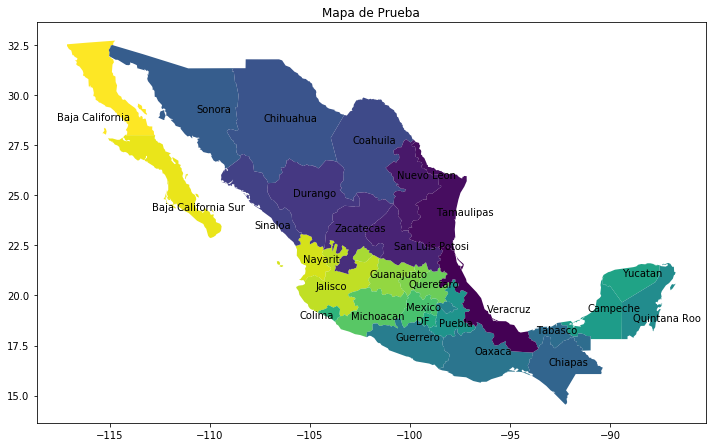

In [186]:
geoplot = geoframeEstados.plot(figsize=(12,12),legend=True,cmap='viridis_r')
plt.title("Mapa de Prueba")
for locacion,label in zip(geoframeC_C_Filtrado.newGeometry, geoframeC_C_Filtrado.STATE_NAME):
    geoplot.annotate(label, xy=(locacion.x,locacion.y), xytext=(3, 3), textcoords="offset points")
plt.show()

In [85]:
geoframeCiudadesCorregido.head()

,NAME,CAPITAL,STATE_NAME,newGeometry
0,Monterrey,Y,Nuevo Leon,POINT (-100.8170852661133 25.67735290527344)
1,Mazatlan,N,Sinaloa,POINT (-107.9160690307617 23.20383262634277)
2,Guadalajara,Y,Jalisco,POINT (-103.3437957763672 20.67359161376953)
3,Tampico,N,Tamaulipas,POINT (-97.84262847900391 22.24323463439941)
4,Mexico City,C,Distrito Federal,POINT (-99.12757110595703 19.42704582214355)
